In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%store -r data
%store -r data_test

In [3]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [4]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       2256 non-null   int64         
 6   city_name                2256 non-null   object        
 7   tem

In [5]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = False
def interpolate_linear(data_dt_test):
    data_dt_test['temp']                = data_dt_test['temp'].interpolate(method='linear')
    data_dt_test['feels_like']          = data_dt_test['feels_like'].interpolate(method='linear')
    data_dt_test['temp_min']            = data_dt_test['temp_min'].interpolate(method='linear')
    data_dt_test['temp_max']            = data_dt_test['temp_max'].interpolate(method='linear')
    data_dt_test['humidity']            = data_dt_test['humidity'].interpolate(method='linear')
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].interpolate(method='linear')

if nulls:
    interpolate_linear(data_dt_test)
data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)


In [7]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


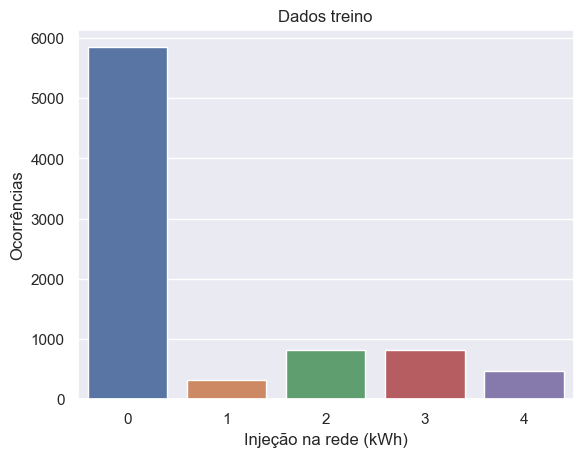

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


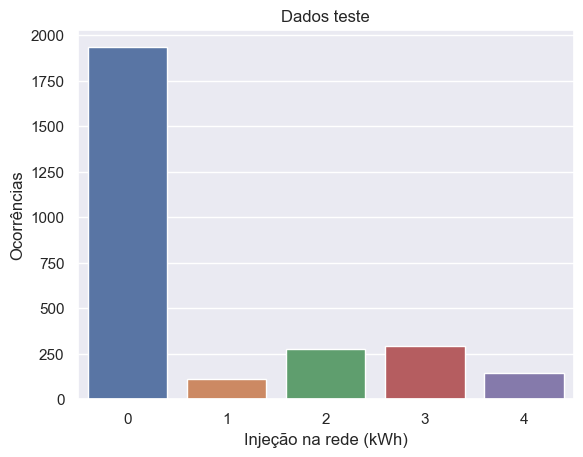

In [8]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [9]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import metrics
from scikeras.wrappers import KerasClassifier

In [11]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.12.1


In [12]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(32, input_dim=10, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(8, activation=activation))
    model.add(Dense(5, activation='softmax'))  # Adjusted for 5 classes
    
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=tf.optimizers.Adam(learning_rate),
        metrics=['accuracy']
    )
    return model


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled = pd.DataFrame(scaler_x.transform(X[X.columns]), columns = X.columns)

C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jmbar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


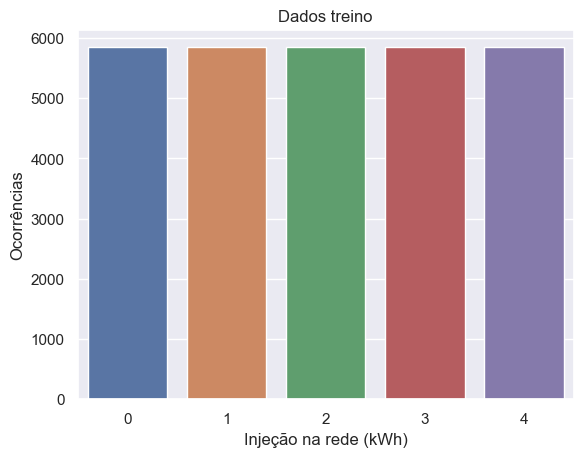

In [14]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_train and y_train are your original data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Creating DataFrames from the resampled data
X_resampled_df = pd.DataFrame(X_resampled, columns=X_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=y_train.columns)

# Concatenating DataFrames along columns
balanced_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
grafico_barras(y_resampled_df,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')

In [15]:
X.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,13.97,13.54,11.45,14.04,81,4,3
1,0.0,0.0,0.0,13.48,13.02,13.43,13.90,82,4,3
2,0.0,0.0,0.0,12.93,12.47,12.72,13.43,84,4,3
3,0.0,0.0,0.0,12.61,12.15,10.34,12.93,85,4,3
4,0.0,0.0,0.0,12.61,12.17,9.79,12.93,86,4,3


In [16]:
X_scaled.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.0,0.0,0.0,0.336788,0.361443,0.323608,0.316800,0.765432,0.428571,0.666667
1,0.0,0.0,0.0,0.324698,0.349494,0.376606,0.313310,0.777778,0.428571,0.666667
2,0.0,0.0,0.0,0.311128,0.336857,0.357602,0.301595,0.802469,0.428571,0.666667
3,0.0,0.0,0.0,0.303232,0.329504,0.293897,0.289133,0.814815,0.428571,0.666667
4,0.0,0.0,0.0,0.303232,0.329963,0.279176,0.289133,0.827160,0.428571,0.666667


In [17]:
X_resampled_df.head()

,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),temp,feels_like,temp_min,temp_max,humidity,weather_description,Estacao
0,0.904,0.000,0.000,11.81,11.06,11.68,12.33,77,6,4
1,0.358,0.000,0.782,20.17,19.89,19.71,20.72,63,6,3
2,0.000,0.341,0.000,11.81,10.74,11.12,12.33,65,6,3
3,0.000,0.521,0.000,9.50,8.46,7.72,9.59,91,4,4
4,0.034,0.000,0.228,20.15,20.28,19.45,20.15,79,3,1


In [18]:
optimizer = ['SGD', 'RMSprop', 'Adagrad']
param_grid = dict(optimizer = optimizer)

In [19]:
kf = KFold(n_splits =10, shuffle = True, random_state = 2021)

In [20]:
build_model = build_model()
model = KerasClassifier(model = build_model, batch_size = 40, validation_split = 0.2, epochs = 20, random_state=2021)

In [21]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = kf, scoring = 'accuracy',refit = 'True', verbose = 1,error_score='raise',)
grid_search.fit(X_resampled_df,y_resampled_df)

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_5avfxp0\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp_5avfxp0\assets


Fitting 10 folds for each of 3 candidates, totalling 30 fits


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptrxw8ck2\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmptrxw8ck2\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2245 - accuracy: 0.2874 - val_loss: 2.8606 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8670 - accuracy: 0.2469 - val_loss: 3.0626 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8017 - accuracy: 0.2456 - val_loss: 2.9238 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7637 - accuracy: 0.2411 - val_loss: 3.6606 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7530 - accuracy: 0.2408 - val_loss: 2.6324 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7370 - accuracy: 0.2415 - val_loss: 2.0788 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7336 - accuracy: 0.2411 - val_loss: 3.0495 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphj14kooz\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmphj14kooz\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2483 - accuracy: 0.2841 - val_loss: 3.0355 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8807 - accuracy: 0.2445 - val_loss: 2.7698 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8583 - accuracy: 0.2433 - val_loss: 2.9994 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8305 - accuracy: 0.2389 - val_loss: 2.8444 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8112 - accuracy: 0.2373 - val_loss: 3.1803 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7976 - accuracy: 0.2365 - val_loss: 2.8154 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7899 - accuracy: 0.2340 - val_loss: 2.0891 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpf_llf_3v\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpf_llf_3v\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.1937 - accuracy: 0.2730 - val_loss: 3.0441 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8610 - accuracy: 0.2475 - val_loss: 2.4710 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8201 - accuracy: 0.2432 - val_loss: 2.8673 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7922 - accuracy: 0.2408 - val_loss: 2.8307 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7583 - accuracy: 0.2382 - val_loss: 3.9364 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7374 - accuracy: 0.2394 - val_loss: 2.1885 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7246 - accuracy: 0.2389 - val_loss: 3.0023 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6d97646q\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp6d97646q\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2301 - accuracy: 0.2843 - val_loss: 2.4757 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8930 - accuracy: 0.2448 - val_loss: 2.6855 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8561 - accuracy: 0.2414 - val_loss: 2.7497 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7908 - accuracy: 0.2383 - val_loss: 3.2084 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7590 - accuracy: 0.2375 - val_loss: 2.6614 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7270 - accuracy: 0.2361 - val_loss: 2.1560 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7212 - accuracy: 0.2352 - val_loss: 3.6383 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpz4vcz9k9\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpz4vcz9k9\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2289 - accuracy: 0.2818 - val_loss: 3.1223 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8667 - accuracy: 0.2462 - val_loss: 3.3817 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7954 - accuracy: 0.2439 - val_loss: 2.3774 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7794 - accuracy: 0.2411 - val_loss: 2.4856 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7547 - accuracy: 0.2377 - val_loss: 2.5463 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7375 - accuracy: 0.2388 - val_loss: 2.1306 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7299 - accuracy: 0.2377 - val_loss: 3.1193 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv_uu1t_8\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpv_uu1t_8\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2455 - accuracy: 0.2921 - val_loss: 2.5180 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8728 - accuracy: 0.2499 - val_loss: 2.9927 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8040 - accuracy: 0.2463 - val_loss: 2.2234 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7696 - accuracy: 0.2421 - val_loss: 2.8898 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7718 - accuracy: 0.2422 - val_loss: 2.8624 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7461 - accuracy: 0.2392 - val_loss: 2.2187 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7291 - accuracy: 0.2394 - val_loss: 2.8169 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzy54v5b0\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzy54v5b0\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2087 - accuracy: 0.2775 - val_loss: 2.6319 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8435 - accuracy: 0.2485 - val_loss: 2.8298 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8090 - accuracy: 0.2433 - val_loss: 2.1422 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7709 - accuracy: 0.2425 - val_loss: 3.0632 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7582 - accuracy: 0.2393 - val_loss: 3.8470 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7465 - accuracy: 0.2400 - val_loss: 2.0987 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7246 - accuracy: 0.2399 - val_loss: 3.0524 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzri42kfg\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzri42kfg\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2484 - accuracy: 0.2864 - val_loss: 3.9806 - val_accuracy: 0.0015
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8560 - accuracy: 0.2469 - val_loss: 2.8894 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8365 - accuracy: 0.2451 - val_loss: 3.0378 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8047 - accuracy: 0.2413 - val_loss: 2.5285 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7693 - accuracy: 0.2373 - val_loss: 2.3416 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7464 - accuracy: 0.2392 - val_loss: 1.9971 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7295 - accuracy: 0.2376 - val_loss: 2.8534 - val_acc

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfqb20ydl\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpfqb20ydl\assets


Epoch 1/20
526/526 [==============================] - 4s 4ms/step - loss: 1.2622 - accuracy: 0.2939 - val_loss: 3.1867 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 4ms/step - loss: 0.8820 - accuracy: 0.2486 - val_loss: 3.0364 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8400 - accuracy: 0.2459 - val_loss: 2.7643 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8288 - accuracy: 0.2444 - val_loss: 3.1774 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8227 - accuracy: 0.2421 - val_loss: 2.8238 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8072 - accuracy: 0.2429 - val_loss: 2.6314 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7783 - accuracy: 0.2382 - val_loss: 3.1298 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4fy10ttx\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp4fy10ttx\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2677 - accuracy: 0.3020 - val_loss: 2.5007 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8805 - accuracy: 0.2461 - val_loss: 3.1890 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8448 - accuracy: 0.2430 - val_loss: 2.6587 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8292 - accuracy: 0.2426 - val_loss: 2.6085 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7906 - accuracy: 0.2398 - val_loss: 2.8466 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7607 - accuracy: 0.2390 - val_loss: 2.7814 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7384 - accuracy: 0.2374 - val_loss: 2.8076 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpchh3l612\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpchh3l612\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2245 - accuracy: 0.2874 - val_loss: 2.8606 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8670 - accuracy: 0.2469 - val_loss: 3.0626 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8017 - accuracy: 0.2456 - val_loss: 2.9238 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7637 - accuracy: 0.2411 - val_loss: 3.6606 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7530 - accuracy: 0.2408 - val_loss: 2.6324 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7370 - accuracy: 0.2415 - val_loss: 2.0788 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7336 - accuracy: 0.2411 - val_loss: 3.0495 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi52k99cv\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi52k99cv\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2483 - accuracy: 0.2841 - val_loss: 3.0355 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8807 - accuracy: 0.2445 - val_loss: 2.7698 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8583 - accuracy: 0.2433 - val_loss: 2.9994 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8305 - accuracy: 0.2389 - val_loss: 2.8444 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8112 - accuracy: 0.2373 - val_loss: 3.1803 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7976 - accuracy: 0.2365 - val_loss: 2.8154 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7899 - accuracy: 0.2340 - val_loss: 2.0891 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi6r581bm\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpi6r581bm\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.1937 - accuracy: 0.2730 - val_loss: 3.0441 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8610 - accuracy: 0.2475 - val_loss: 2.4710 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8201 - accuracy: 0.2432 - val_loss: 2.8673 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7922 - accuracy: 0.2408 - val_loss: 2.8307 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7583 - accuracy: 0.2382 - val_loss: 3.9364 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7374 - accuracy: 0.2394 - val_loss: 2.1885 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7246 - accuracy: 0.2389 - val_loss: 3.0023 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpneqv_o1j\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpneqv_o1j\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2301 - accuracy: 0.2843 - val_loss: 2.4757 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8930 - accuracy: 0.2448 - val_loss: 2.6855 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 3s 5ms/step - loss: 0.8561 - accuracy: 0.2414 - val_loss: 2.7497 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 3s 5ms/step - loss: 0.7908 - accuracy: 0.2383 - val_loss: 3.2084 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 3s 5ms/step - loss: 0.7590 - accuracy: 0.2375 - val_loss: 2.6614 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 3s 5ms/step - loss: 0.7270 - accuracy: 0.2361 - val_loss: 2.1560 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 3s 5ms/step - loss: 0.7212 - accuracy: 0.2352 - val_loss: 3.6383 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpti5fp7m_\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpti5fp7m_\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2289 - accuracy: 0.2818 - val_loss: 3.1223 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 4ms/step - loss: 0.8667 - accuracy: 0.2462 - val_loss: 3.3817 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7954 - accuracy: 0.2439 - val_loss: 2.3774 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 4ms/step - loss: 0.7794 - accuracy: 0.2411 - val_loss: 2.4856 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 4ms/step - loss: 0.7547 - accuracy: 0.2377 - val_loss: 2.5463 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7375 - accuracy: 0.2388 - val_loss: 2.1306 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 4ms/step - loss: 0.7299 - accuracy: 0.2377 - val_loss: 3.1193 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj_x9_1x4\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj_x9_1x4\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2455 - accuracy: 0.2921 - val_loss: 2.5180 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8728 - accuracy: 0.2499 - val_loss: 2.9927 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8040 - accuracy: 0.2463 - val_loss: 2.2234 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7696 - accuracy: 0.2421 - val_loss: 2.8898 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7718 - accuracy: 0.2422 - val_loss: 2.8624 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7461 - accuracy: 0.2392 - val_loss: 2.2187 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7291 - accuracy: 0.2394 - val_loss: 2.8169 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnkkiqyq1\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpnkkiqyq1\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2087 - accuracy: 0.2775 - val_loss: 2.6319 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8435 - accuracy: 0.2485 - val_loss: 2.8298 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8090 - accuracy: 0.2433 - val_loss: 2.1422 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7709 - accuracy: 0.2425 - val_loss: 3.0632 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7582 - accuracy: 0.2393 - val_loss: 3.8470 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7465 - accuracy: 0.2400 - val_loss: 2.0987 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7246 - accuracy: 0.2399 - val_loss: 3.0524 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpylepf6mg\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpylepf6mg\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2484 - accuracy: 0.2864 - val_loss: 3.9806 - val_accuracy: 0.0015
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8560 - accuracy: 0.2469 - val_loss: 2.8894 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8365 - accuracy: 0.2451 - val_loss: 3.0378 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8047 - accuracy: 0.2413 - val_loss: 2.5285 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7693 - accuracy: 0.2373 - val_loss: 2.3416 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7464 - accuracy: 0.2392 - val_loss: 1.9971 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7295 - accuracy: 0.2376 - val_loss: 2.8534 - val_acc

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj8pwqrqd\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpj8pwqrqd\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2622 - accuracy: 0.2939 - val_loss: 3.1867 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8820 - accuracy: 0.2486 - val_loss: 3.0364 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8400 - accuracy: 0.2459 - val_loss: 2.7643 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8288 - accuracy: 0.2444 - val_loss: 3.1774 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8227 - accuracy: 0.2421 - val_loss: 2.8238 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8072 - accuracy: 0.2429 - val_loss: 2.6314 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7783 - accuracy: 0.2382 - val_loss: 3.1298 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw7je0_tl\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpw7je0_tl\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2677 - accuracy: 0.3020 - val_loss: 2.5007 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8805 - accuracy: 0.2461 - val_loss: 3.1890 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8448 - accuracy: 0.2430 - val_loss: 2.6587 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8292 - accuracy: 0.2426 - val_loss: 2.6085 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7906 - accuracy: 0.2398 - val_loss: 2.8466 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7607 - accuracy: 0.2390 - val_loss: 2.7814 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7384 - accuracy: 0.2374 - val_loss: 2.8076 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp08ioc1q8\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp08ioc1q8\assets


Epoch 1/20
526/526 [==============================] - 3s 4ms/step - loss: 1.2245 - accuracy: 0.2874 - val_loss: 2.8606 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8670 - accuracy: 0.2469 - val_loss: 3.0626 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8017 - accuracy: 0.2456 - val_loss: 2.9238 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7637 - accuracy: 0.2411 - val_loss: 3.6606 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7530 - accuracy: 0.2408 - val_loss: 2.6324 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7370 - accuracy: 0.2415 - val_loss: 2.0788 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7336 - accuracy: 0.2411 - val_loss: 3.0495 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplb3yfq1h\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmplb3yfq1h\assets


Epoch 1/20
526/526 [==============================] - 3s 3ms/step - loss: 1.2483 - accuracy: 0.2841 - val_loss: 3.0355 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8807 - accuracy: 0.2445 - val_loss: 2.7698 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8583 - accuracy: 0.2433 - val_loss: 2.9994 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8305 - accuracy: 0.2389 - val_loss: 2.8444 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8112 - accuracy: 0.2373 - val_loss: 3.1803 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7976 - accuracy: 0.2365 - val_loss: 2.8154 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7899 - accuracy: 0.2340 - val_loss: 2.0891 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjtu_obmz\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpjtu_obmz\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.1937 - accuracy: 0.2730 - val_loss: 3.0441 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8610 - accuracy: 0.2475 - val_loss: 2.4710 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8201 - accuracy: 0.2432 - val_loss: 2.8673 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7922 - accuracy: 0.2408 - val_loss: 2.8307 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7583 - accuracy: 0.2382 - val_loss: 3.9364 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7374 - accuracy: 0.2394 - val_loss: 2.1885 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.2389 - val_loss: 3.0023 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt27xg8x1\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpt27xg8x1\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2301 - accuracy: 0.2843 - val_loss: 2.4757 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 2s 3ms/step - loss: 0.8930 - accuracy: 0.2448 - val_loss: 2.6855 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8561 - accuracy: 0.2414 - val_loss: 2.7497 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7908 - accuracy: 0.2383 - val_loss: 3.2084 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7590 - accuracy: 0.2375 - val_loss: 2.6614 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 3ms/step - loss: 0.7270 - accuracy: 0.2361 - val_loss: 2.1560 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 2s 3ms/step - loss: 0.7212 - accuracy: 0.2352 - val_loss: 3.6383 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpn_lu17vf\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpn_lu17vf\assets


Epoch 1/20
526/526 [==============================] - 2s 2ms/step - loss: 1.2289 - accuracy: 0.2818 - val_loss: 3.1223 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8667 - accuracy: 0.2462 - val_loss: 3.3817 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7954 - accuracy: 0.2439 - val_loss: 2.3774 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7794 - accuracy: 0.2411 - val_loss: 2.4856 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7547 - accuracy: 0.2377 - val_loss: 2.5463 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7375 - accuracy: 0.2388 - val_loss: 2.1306 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.2377 - val_loss: 3.1193 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzf4403gk\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzf4403gk\assets


Epoch 1/20
526/526 [==============================] - 2s 2ms/step - loss: 1.2455 - accuracy: 0.2921 - val_loss: 2.5180 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8728 - accuracy: 0.2499 - val_loss: 2.9927 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8040 - accuracy: 0.2463 - val_loss: 2.2234 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7696 - accuracy: 0.2421 - val_loss: 2.8898 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7718 - accuracy: 0.2422 - val_loss: 2.8624 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7461 - accuracy: 0.2392 - val_loss: 2.2187 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7291 - accuracy: 0.2394 - val_loss: 2.8169 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpkh9wp_bt\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpkh9wp_bt\assets


Epoch 1/20
526/526 [==============================] - 2s 2ms/step - loss: 1.2087 - accuracy: 0.2775 - val_loss: 2.6319 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8435 - accuracy: 0.2485 - val_loss: 2.8298 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8090 - accuracy: 0.2433 - val_loss: 2.1422 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7709 - accuracy: 0.2425 - val_loss: 3.0632 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7582 - accuracy: 0.2393 - val_loss: 3.8470 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7465 - accuracy: 0.2400 - val_loss: 2.0987 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.2399 - val_loss: 3.0524 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpc5fbpvad\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpc5fbpvad\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2484 - accuracy: 0.2864 - val_loss: 3.9806 - val_accuracy: 0.0015
Epoch 2/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8560 - accuracy: 0.2469 - val_loss: 2.8894 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8365 - accuracy: 0.2451 - val_loss: 3.0378 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8047 - accuracy: 0.2413 - val_loss: 2.5285 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7693 - accuracy: 0.2373 - val_loss: 2.3416 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7464 - accuracy: 0.2392 - val_loss: 1.9971 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7295 - accuracy: 0.2376 - val_loss: 2.8534 - val_acc

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2yv49eff\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmp2yv49eff\assets


Epoch 1/20
526/526 [==============================] - 2s 2ms/step - loss: 1.2622 - accuracy: 0.2939 - val_loss: 3.1867 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8820 - accuracy: 0.2486 - val_loss: 3.0364 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8400 - accuracy: 0.2459 - val_loss: 2.7643 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8288 - accuracy: 0.2444 - val_loss: 3.1774 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8227 - accuracy: 0.2421 - val_loss: 2.8238 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8072 - accuracy: 0.2429 - val_loss: 2.6314 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7783 - accuracy: 0.2382 - val_loss: 3.1298 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzwzuwhgc\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpzwzuwhgc\assets


Epoch 1/20
526/526 [==============================] - 2s 3ms/step - loss: 1.2677 - accuracy: 0.3020 - val_loss: 2.5007 - val_accuracy: 0.0000e+00
Epoch 2/20
526/526 [==============================] - 1s 3ms/step - loss: 0.8805 - accuracy: 0.2461 - val_loss: 3.1890 - val_accuracy: 0.0000e+00
Epoch 3/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8448 - accuracy: 0.2430 - val_loss: 2.6587 - val_accuracy: 0.0000e+00
Epoch 4/20
526/526 [==============================] - 1s 2ms/step - loss: 0.8292 - accuracy: 0.2426 - val_loss: 2.6085 - val_accuracy: 0.0000e+00
Epoch 5/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7906 - accuracy: 0.2398 - val_loss: 2.8466 - val_accuracy: 0.0000e+00
Epoch 6/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7607 - accuracy: 0.2390 - val_loss: 2.7814 - val_accuracy: 0.0000e+00
Epoch 7/20
526/526 [==============================] - 1s 2ms/step - loss: 0.7384 - accuracy: 0.2374 - val_loss: 2.8076 - val

INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpizjm6j8d\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpizjm6j8d\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpglh_0zfp\assets


INFO:tensorflow:Assets written to: C:\Users\jmbar\AppData\Local\Temp\tmpglh_0zfp\assets


Epoch 1/20
585/585 [==============================] - 2s 3ms/step - loss: 1.2412 - accuracy: 0.2978 - val_loss: 3.0988 - val_accuracy: 0.0000e+00
Epoch 2/20
585/585 [==============================] - 2s 3ms/step - loss: 0.8606 - accuracy: 0.2482 - val_loss: 3.0575 - val_accuracy: 0.0000e+00
Epoch 3/20
585/585 [==============================] - 1s 2ms/step - loss: 0.8157 - accuracy: 0.2415 - val_loss: 2.4233 - val_accuracy: 0.0000e+00
Epoch 4/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7764 - accuracy: 0.2388 - val_loss: 3.2957 - val_accuracy: 0.0000e+00
Epoch 5/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7577 - accuracy: 0.2387 - val_loss: 2.7323 - val_accuracy: 0.0000e+00
Epoch 6/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7340 - accuracy: 0.2402 - val_loss: 2.4428 - val_accuracy: 0.0000e+00
Epoch 7/20
585/585 [==============================] - 1s 2ms/step - loss: 0.7078 - accuracy: 0.2389 - val_loss: 1.8192 - val

GridSearchCV(cv=KFold(n_splits=10, random_state=2021, shuffle=True),
             error_score='raise',
             estimator=KerasClassifier(batch_size=40, epochs=20, model=<keras.engine.sequential.Sequential object at 0x000001A65AC42F50>, random_state=2021, validation_split=0.2),
             param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             refit='True', scoring='accuracy', verbose=1)

In [22]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))

Best: 0.595722 using {'optimizer': 'SGD'}


In [23]:
# means = grid_search.cv_results_['mean_test_score']
# stds = grid_search.cv_results_['std_test_score']
# params = grid_search.cv_results_['params']

In [24]:
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with %r" %(mean, stdev,param))

In [25]:
best_mlp_model = model

In [26]:
best_mlp_model.fit(X_resampled_df, y_resampled_df, epochs = 30, validation_data = (X_test, y_test), verbose =1)

Epoch 1/30
731/731 [==============================] - 3s 2ms/step - loss: 1.3225 - accuracy: 0.2309 - val_loss: 0.7672 - val_accuracy: 0.6638
Epoch 2/30
731/731 [==============================] - 2s 2ms/step - loss: 1.0024 - accuracy: 0.2026 - val_loss: 0.6531 - val_accuracy: 0.5577
Epoch 3/30
731/731 [==============================] - 1s 2ms/step - loss: 0.8937 - accuracy: 0.1930 - val_loss: 0.5411 - val_accuracy: 0.6325
Epoch 4/30
731/731 [==============================] - 2s 3ms/step - loss: 0.8447 - accuracy: 0.1900 - val_loss: 0.8111 - val_accuracy: 0.4931
Epoch 5/30
731/731 [==============================] - 2s 2ms/step - loss: 0.8127 - accuracy: 0.1899 - val_loss: 0.4796 - val_accuracy: 0.6442
Epoch 6/30
731/731 [==============================] - 2s 2ms/step - loss: 0.7893 - accuracy: 0.1895 - val_loss: 0.4354 - val_accuracy: 0.6663
Epoch 7/30
731/731 [==============================] - 1s 2ms/step - loss: 0.8017 - accuracy: 0.1896 - val_loss: 0.5137 - val_accuracy: 0.6380
Epoch 

KerasClassifier(
	model=<keras.engine.sequential.Sequential object at 0x000001A65AC42F50>
	build_fn=None
	warm_start=False
	random_state=2021
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

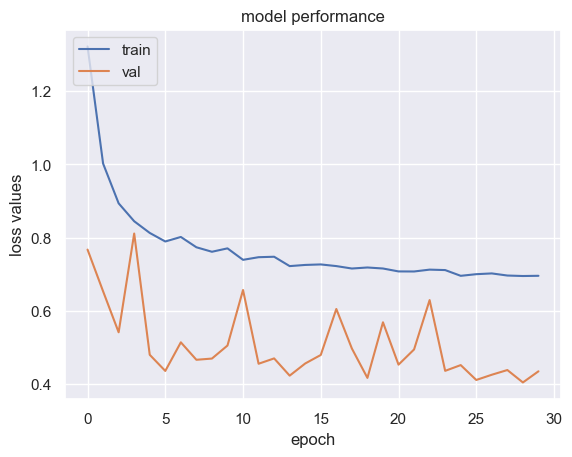

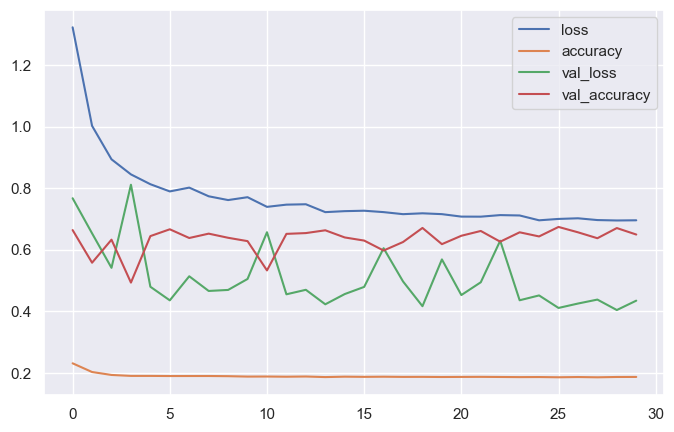

In [28]:
pd.DataFrame(best_mlp_model.history_).plot(figsize=(8,5))
plt.show()

In [29]:
prediction = best_mlp_model.predict(X_test)

69/69 [==============================] - 0s 2ms/step


In [30]:
from sklearn import metrics

In [31]:
accuracy = metrics.accuracy_score(y_test, prediction)
#precision = metrics.precision_score(y_test, prediction, average='weighted')
#recall = metrics.recall_score(y_test, prediction, average='weighted')

print('Accuracy: ', accuracy)
#print('Precision: ', precision)
#print('Recall: ', recall)

Accuracy:  0.8122730573710966


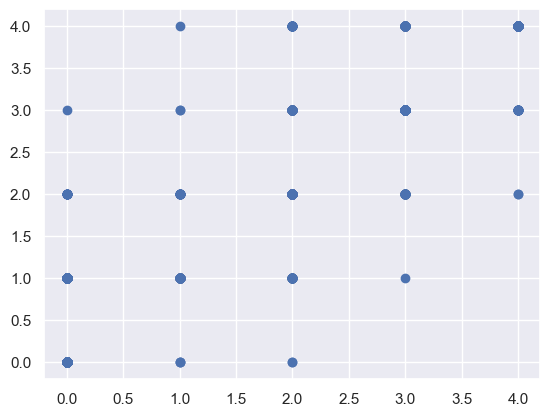

In [32]:
plt.scatter(y_test,prediction)

In [33]:
def real_predicted_viz(limit):
    plt.figure(figsize=(14,6))
    plt.plot(y_test[:limit],color='green',label='Actual')
    plt.plot(prediction[:limit],color='red',label='Predicted')
    plt.grid(alpha=0.3)

    plt.title('Real x Predicted')
    plt.legend()
    plt.show()

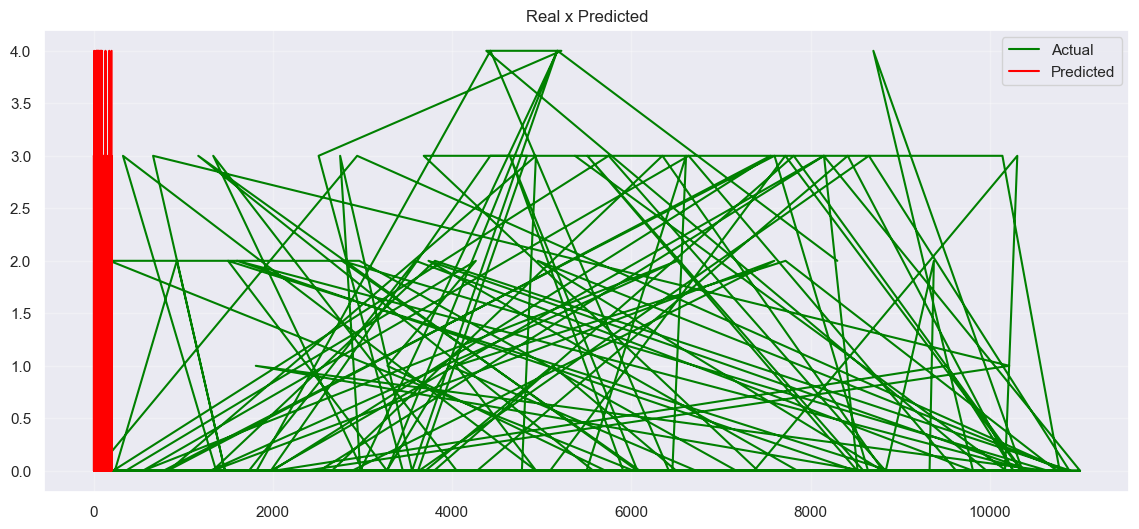

In [34]:
real_predicted_viz(200)

In [35]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)

In [36]:
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)
predictions_sub = best_mlp_model.predict(X_test_submission)
predictions_sub_2 = flat_list = [item for sublist in predictions_sub for item in sublist]
print(predictions_sub_2)

57/57 [==============================] - 0s 1ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 2, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [37]:
gera_csv(predictions_sub_2,'group20_an.csv')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      1933
           1       0.30      0.73      0.42       110
           2       0.53      0.38      0.44       276
           3       0.58      0.54      0.56       292
           4       0.49      0.79      0.61       143

    accuracy                           0.81      2754
   macro avg       0.58      0.67      0.60      2754
weighted avg       0.85      0.81      0.82      2754



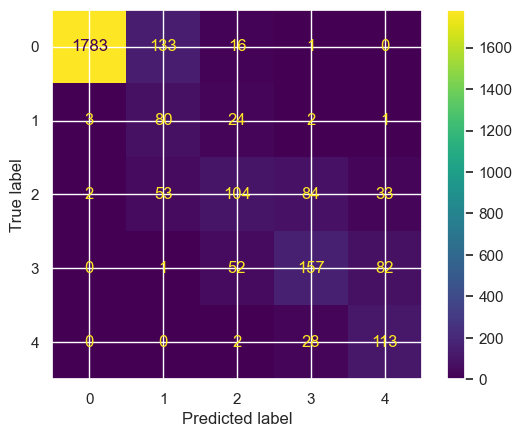

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,prediction)

plt.show()

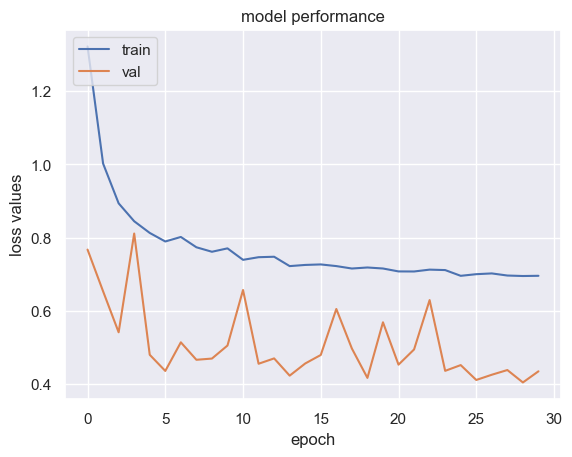

In [40]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('model performance')
plt.ylabel('loss values')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()